# Brain Tumor Analysis

# Importing required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Reading data set Brain Tumor

In [2]:
df = pd.read_csv("Brain Tumor.csv")
df.head()

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

In [3]:
df.shape

(3762, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [5]:
df.describe

<bound method NDFrame.describe of           Image  Class       Mean     Variance  Standard Deviation   Entropy  \
0        Image1      0   6.535339   619.587845           24.891522  0.109059   
1        Image2      0   8.749969   805.957634           28.389393  0.266538   
2        Image3      1   7.341095  1143.808219           33.820234  0.001467   
3        Image4      1   5.958145   959.711985           30.979219  0.001477   
4        Image5      0   7.315231   729.540579           27.010009  0.146761   
...         ...    ...        ...          ...                 ...       ...   
3757  Image3758      0  21.234512  1208.850174           34.768523  0.063774   
3758  Image3759      0  20.435349  1227.151440           35.030721  0.066763   
3759  Image3760      0  18.011520  1151.582765           33.934978  0.068396   
3760  Image3761      0  13.330429   945.732779           30.752769  0.087872   
3761  Image3762      0   6.110138   480.884025           21.929068  0.118171   

     

# Pre-processing 

In [6]:
# Independent Features
X = df.drop(columns="Class")
X.head()

Image      Mean     Variance  Standard Deviation   Entropy  Skewness  \
0  Image1  6.535339   619.587845           24.891522  0.109059  4.276477   
1  Image2  8.749969   805.957634           28.389393  0.266538  3.718116   
2  Image3  7.341095  1143.808219           33.820234  0.001467  5.061750   
3  Image4  5.958145   959.711985           30.979219  0.001477  5.677977   
4  Image5  7.315231   729.540579           27.010009  0.146761  4.283221   

    Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0  18.900575   98.613971  0.293314  0.086033     0.530941       4.473346   
1  14.464618   63.858816  0.475051  0.225674     0.651352       3.220072   
2  26.479563   81.867206  0.031917  0.001019     0.268275       5.981800   
3  33.428845  151.229741  0.032024  0.001026     0.243851       7.700919   
4  19.079108  174.988756  0.343849  0.118232     0.501140       6.834689   

   Correlation     Coarseness  
0     0.981939  7.458341e-155  
1     0.988834  7.458341e-155  
2     0.978014  7.458341e-155  
3     0.964189  7.458341e-155  
4     0.972789  7.458341e-155

In [7]:
#dependent features
Y = df["Class"]
print(Y.head())
print(Y.unique())

0    0
1    0
2    1
3    1
4    0
Name: Class, dtype: int64
[0 1]


### Dropping irrelevant columns

In [8]:
X.drop(columns="Image", inplace=True)

### Handling null values

In [9]:
X.replace({'?':np.NAN}, inplace=True)

In [10]:
X.isnull().sum()

Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

### Label Encoding for categorical data

In [11]:
#Finding categorical data
feature_dtypes = dict(X.dtypes)
counter = list(feature_dtypes.values())
print(counter.count("object"))

0


# Exploratory Data Analysis

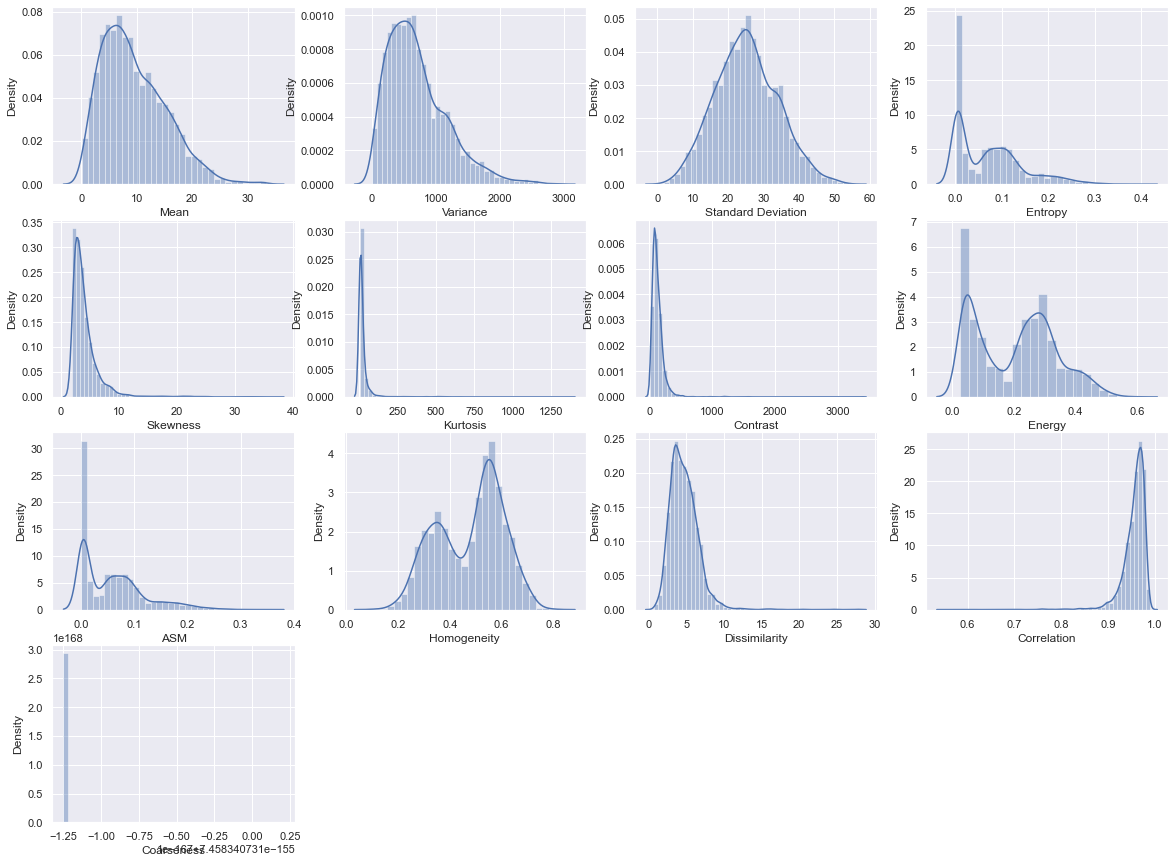

In [12]:
sns.set(rc={'figure.figsize':(20,15)})
for i, column in enumerate(X.columns, 1):
    plt.subplot(4,4,i)
    sns.distplot(X[column])

### Before Scaling Pair Plot

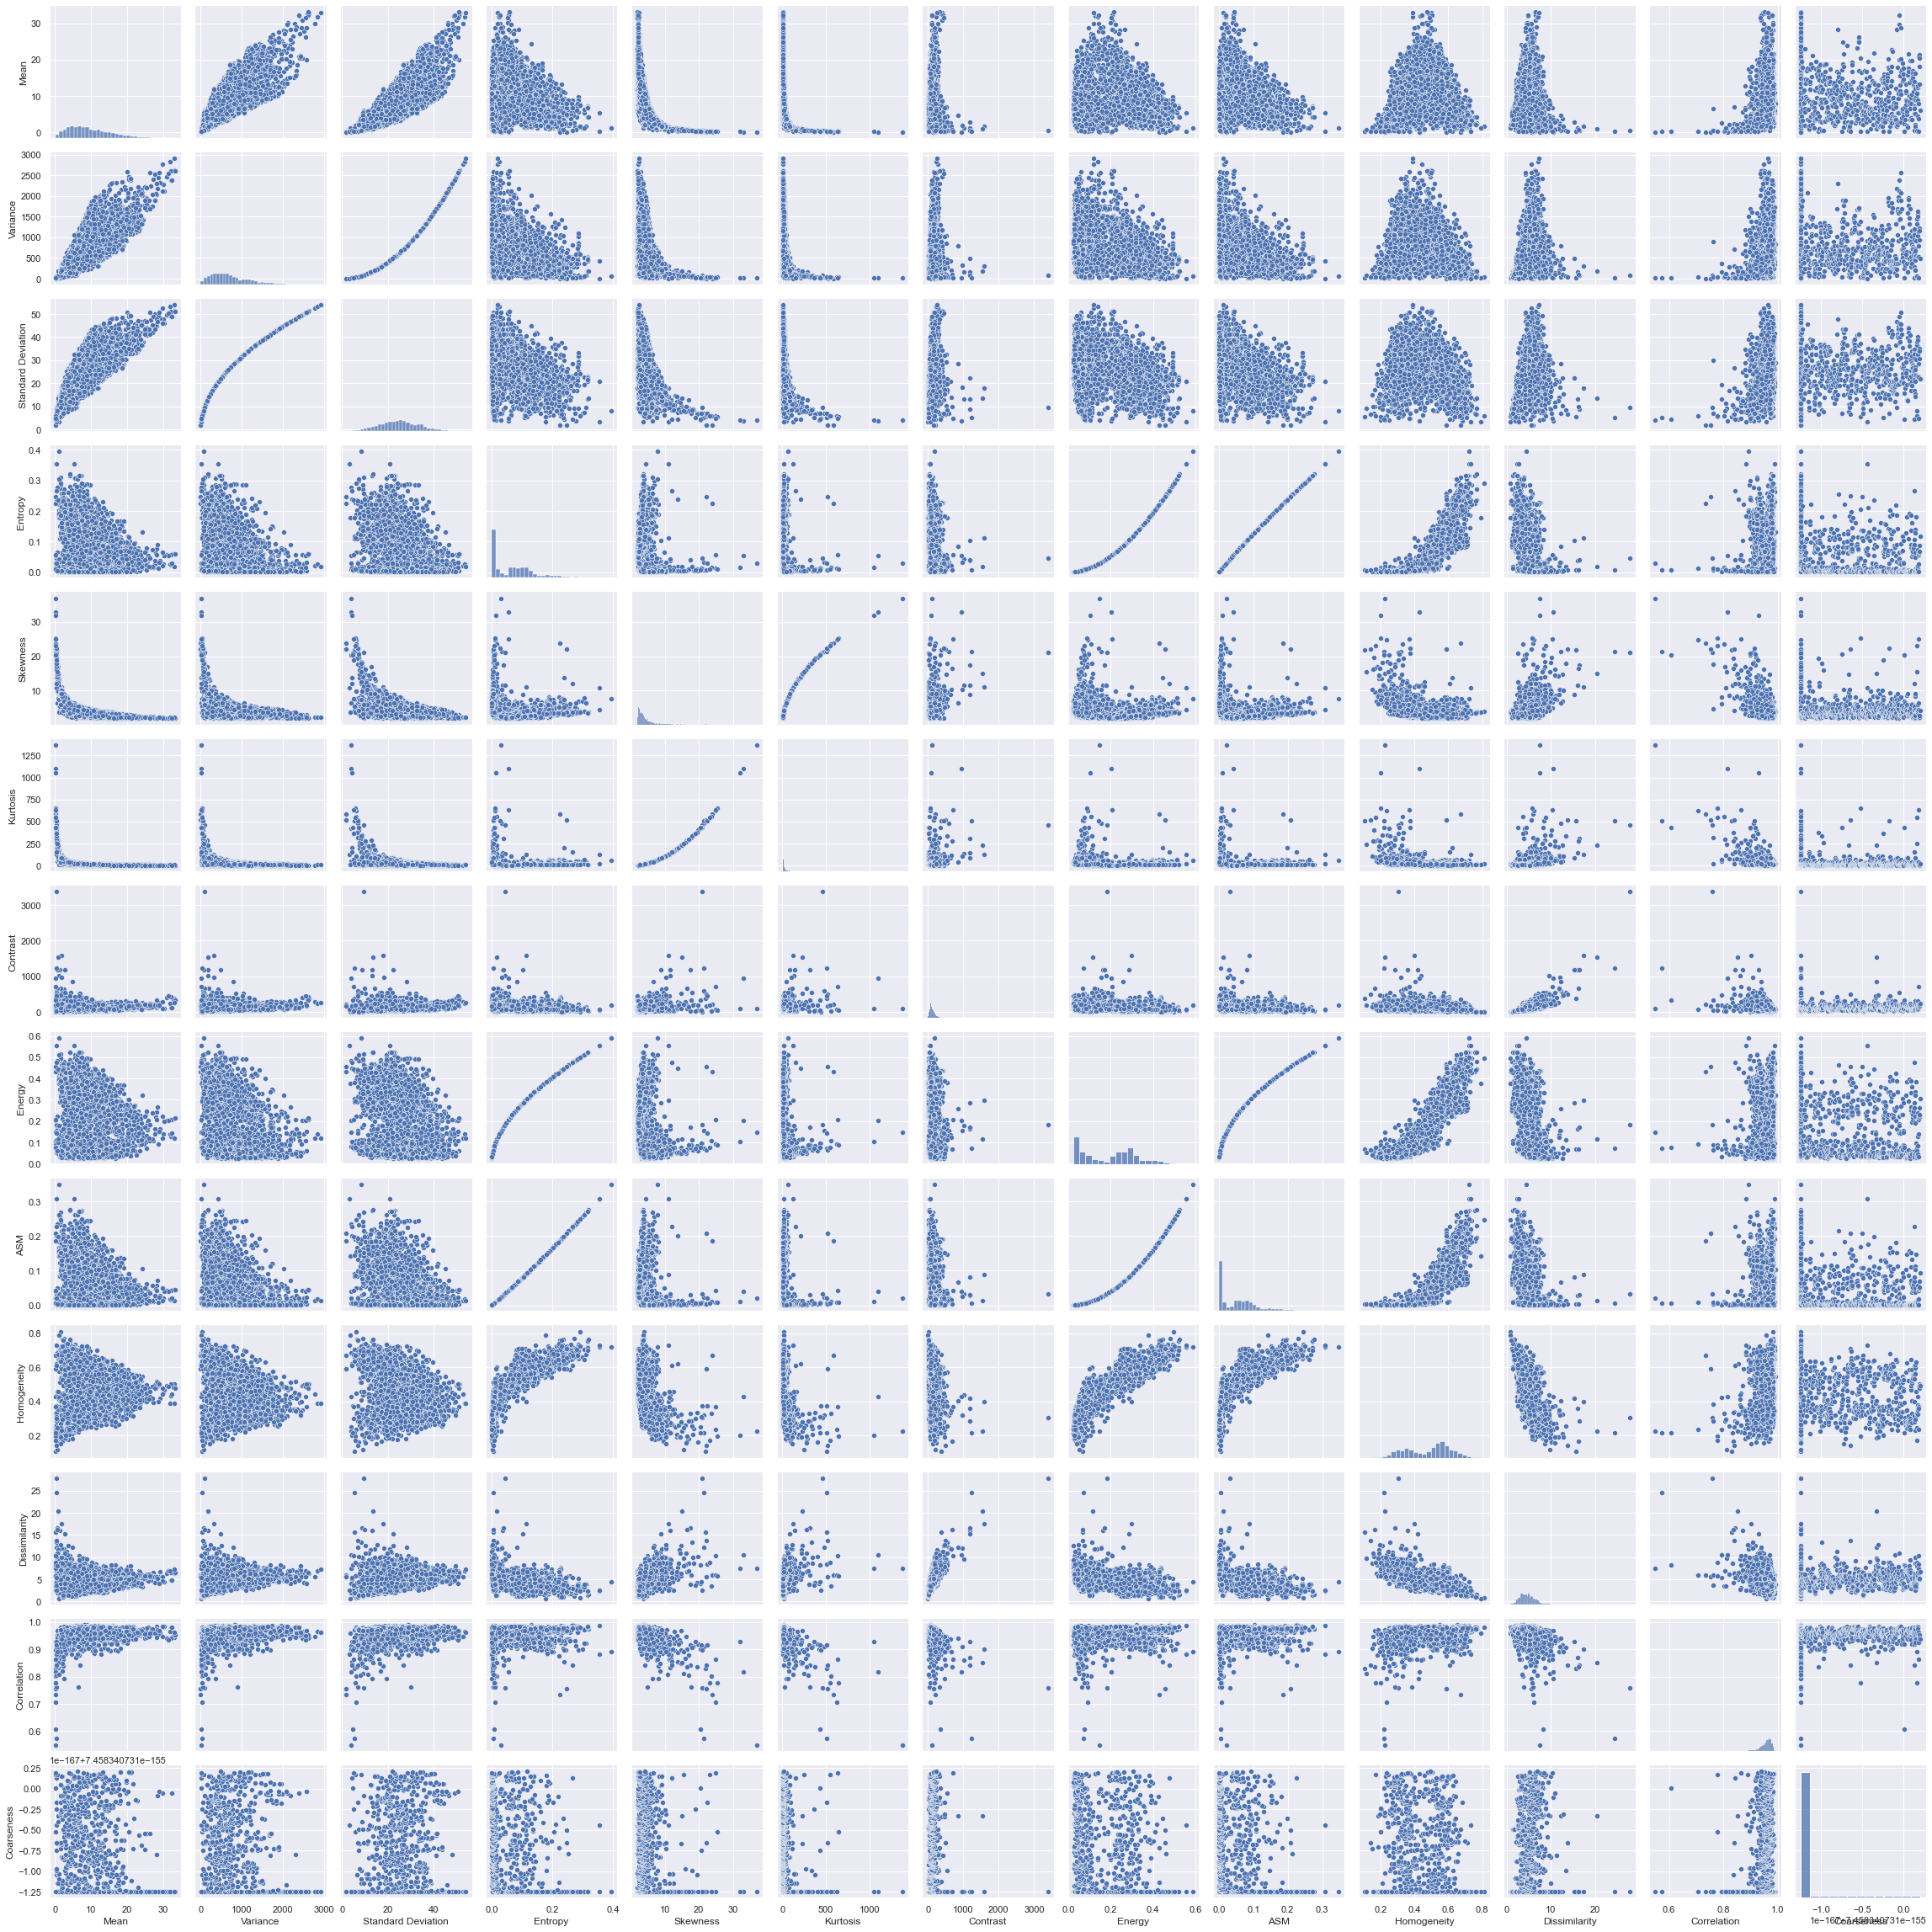

In [13]:
sns.pairplot(X)
plt.show()

## Scaling the dataset 

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    plt.subplot(1, 2, 2)
    df[var] = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(df[var])
    plt.title('after ' + str(t).split('(')[0])

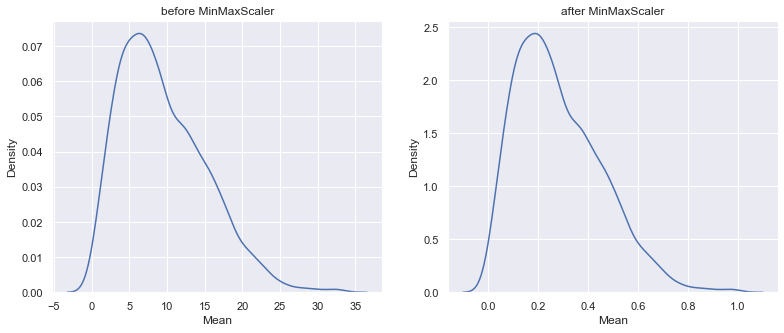

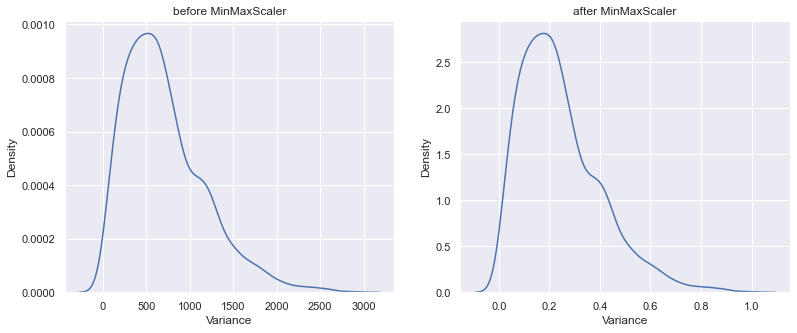

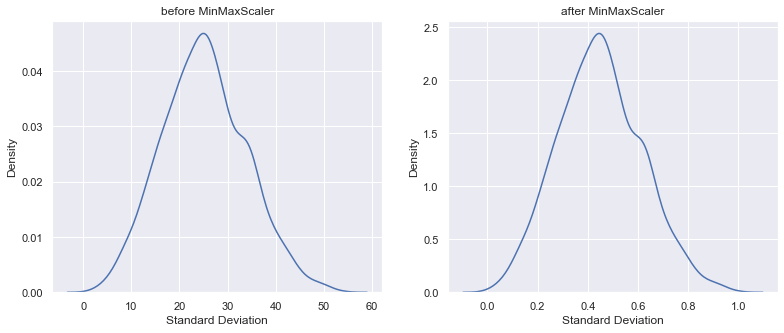

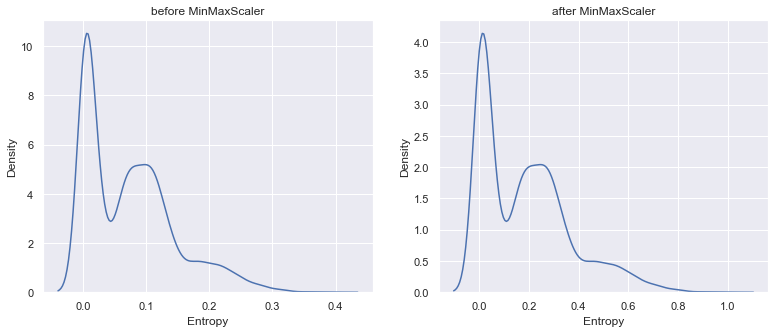

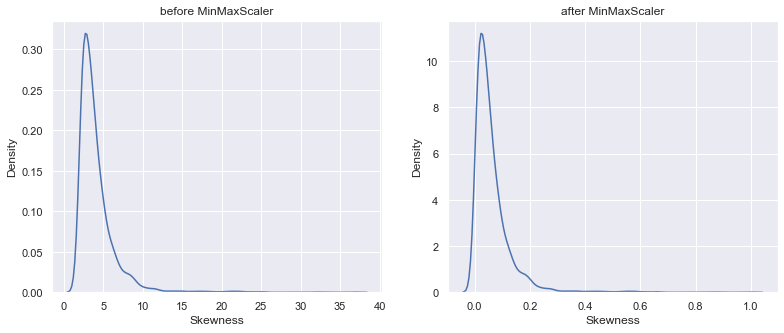

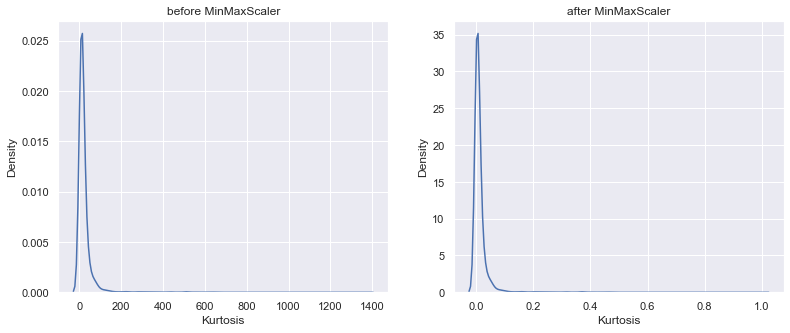

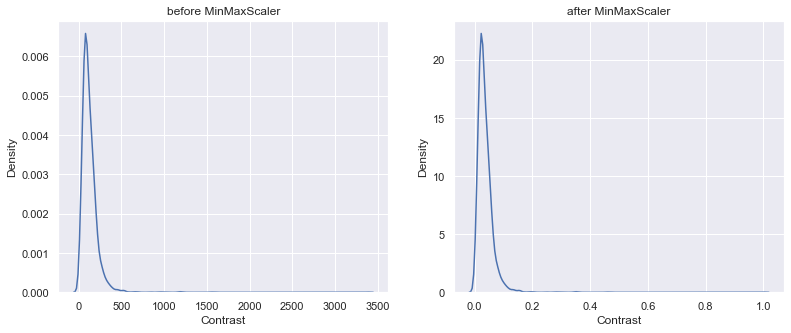

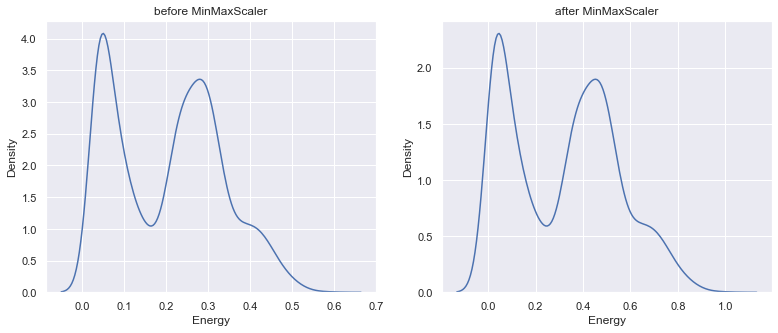

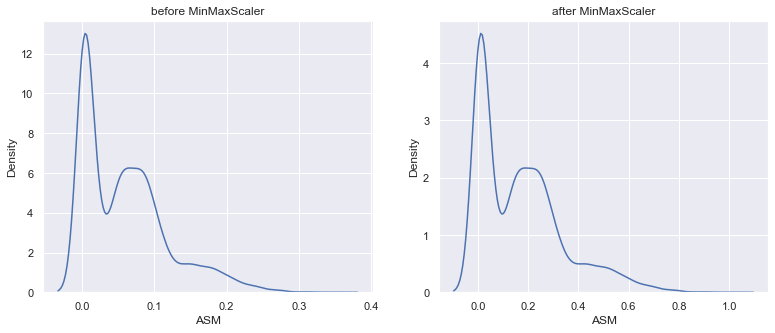

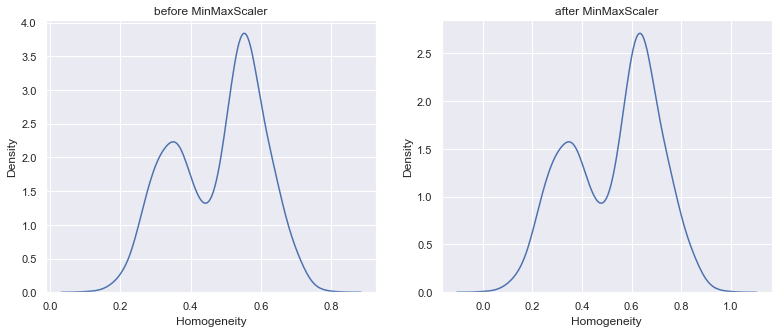

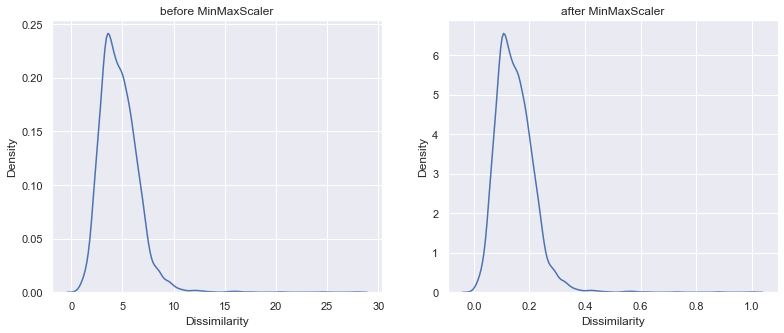

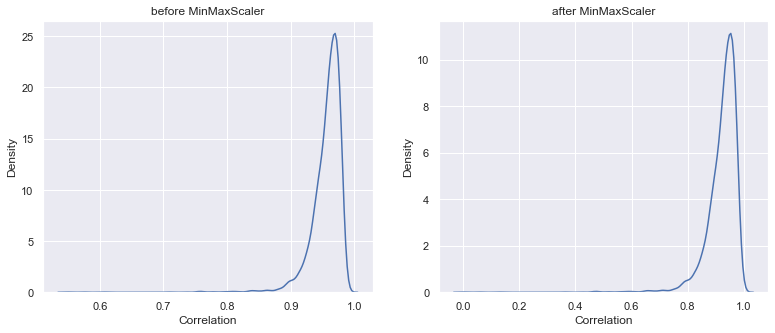

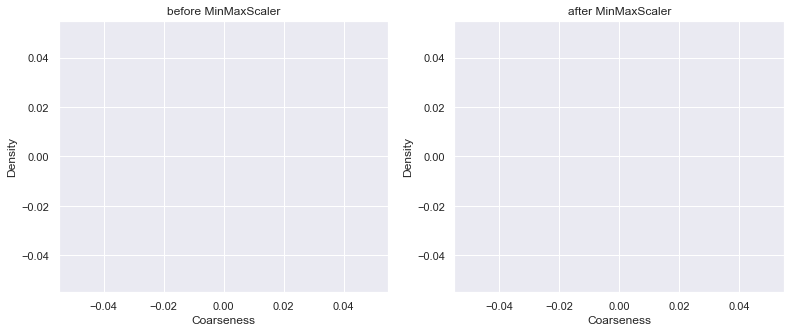

In [16]:
for i in X.columns:
    plots(X, i, MinMaxScaler())

### Scaled dataset with Min Max Scaler

In [17]:
X.head()

Mean  Variance  Standard Deviation   Entropy  Skewness  Kurtosis  \
0  0.194705  0.212023            0.443074  0.274801  0.068211  0.010937   
1  0.261489  0.276124            0.510114  0.674843  0.052278  0.007693   
2  0.219003  0.392326            0.614200  0.001487  0.090618  0.016478   
3  0.177300  0.329007            0.559750  0.001513  0.108202  0.021559   
4  0.218223  0.249840            0.483677  0.370574  0.068403  0.011067   

   Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  \
0  0.028236  0.475410  0.246092     0.603108       0.139694     0.981764   
1  0.017951  0.797096  0.648383     0.773800       0.093527     0.997417   
2  0.023280  0.012719  0.001173     0.230760       0.195261     0.972855   
3  0.043805  0.012908  0.001192     0.196137       0.258588     0.941475   
4  0.050836  0.564860  0.338854     0.560862       0.226679     0.960995   

   Coarseness  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

### After Scaling: Pair Plot

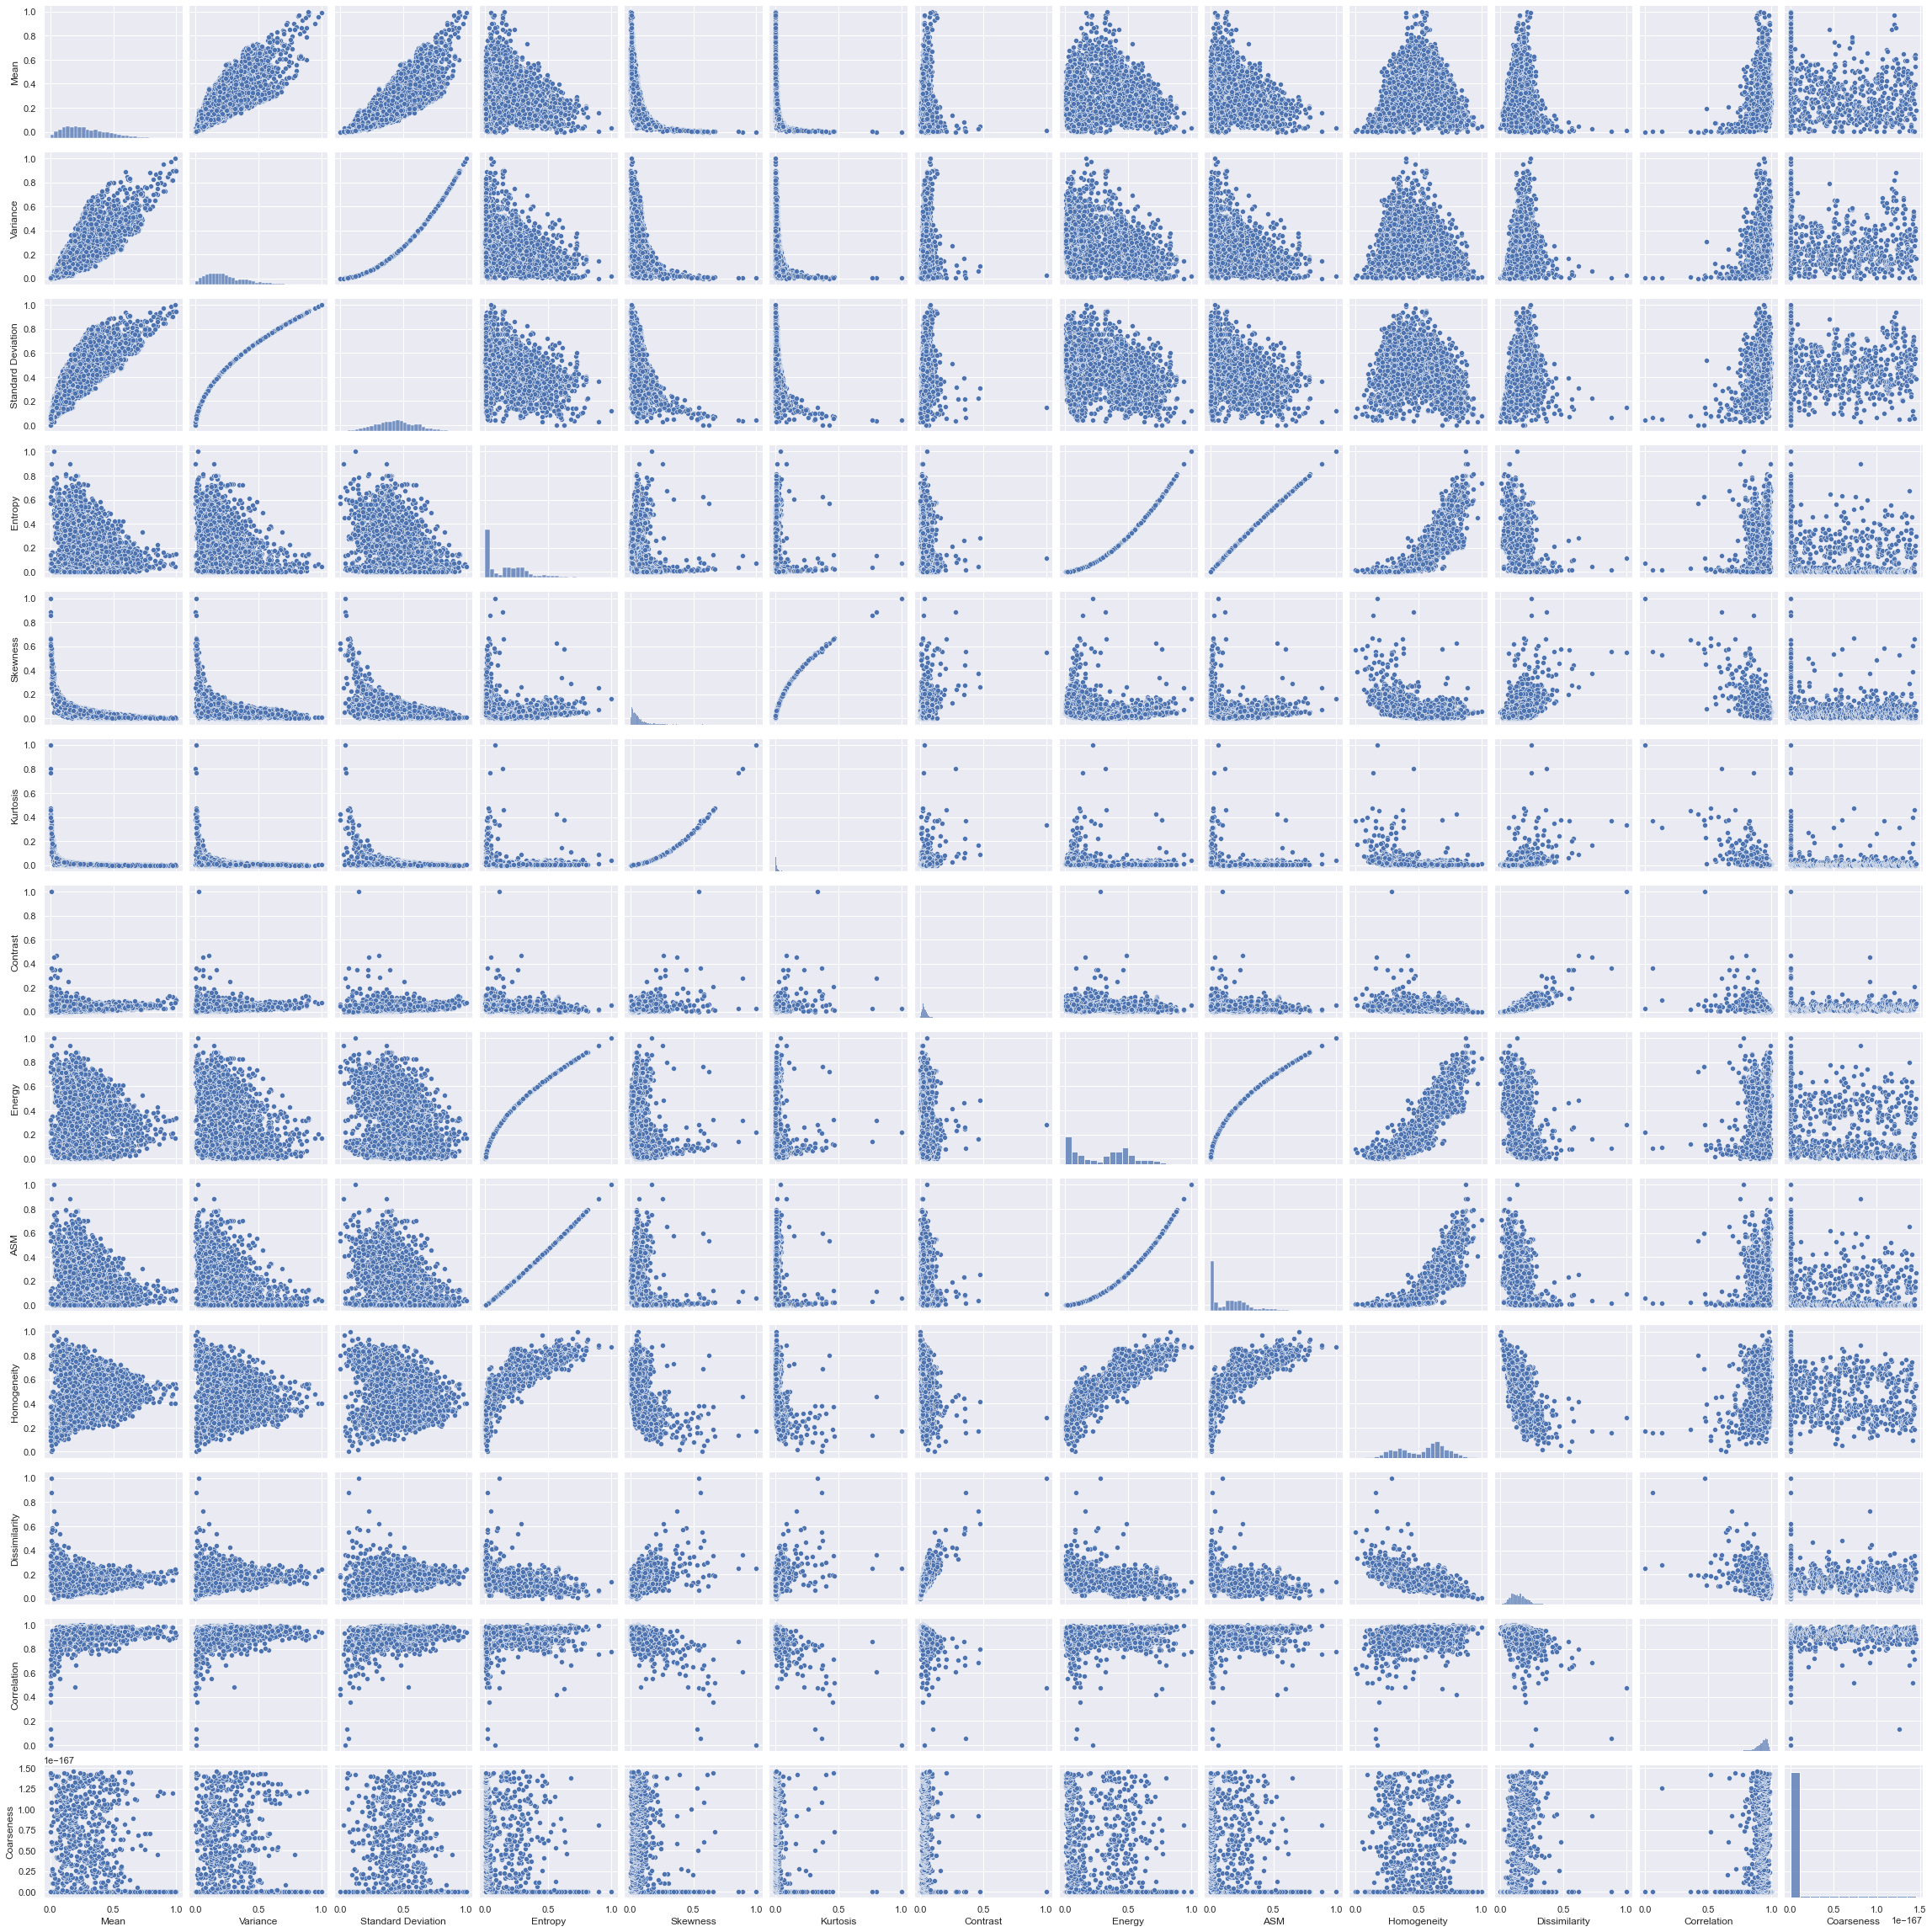

In [18]:
sns.pairplot(X)
plt.show()

## Heat Map

<AxesSubplot:>

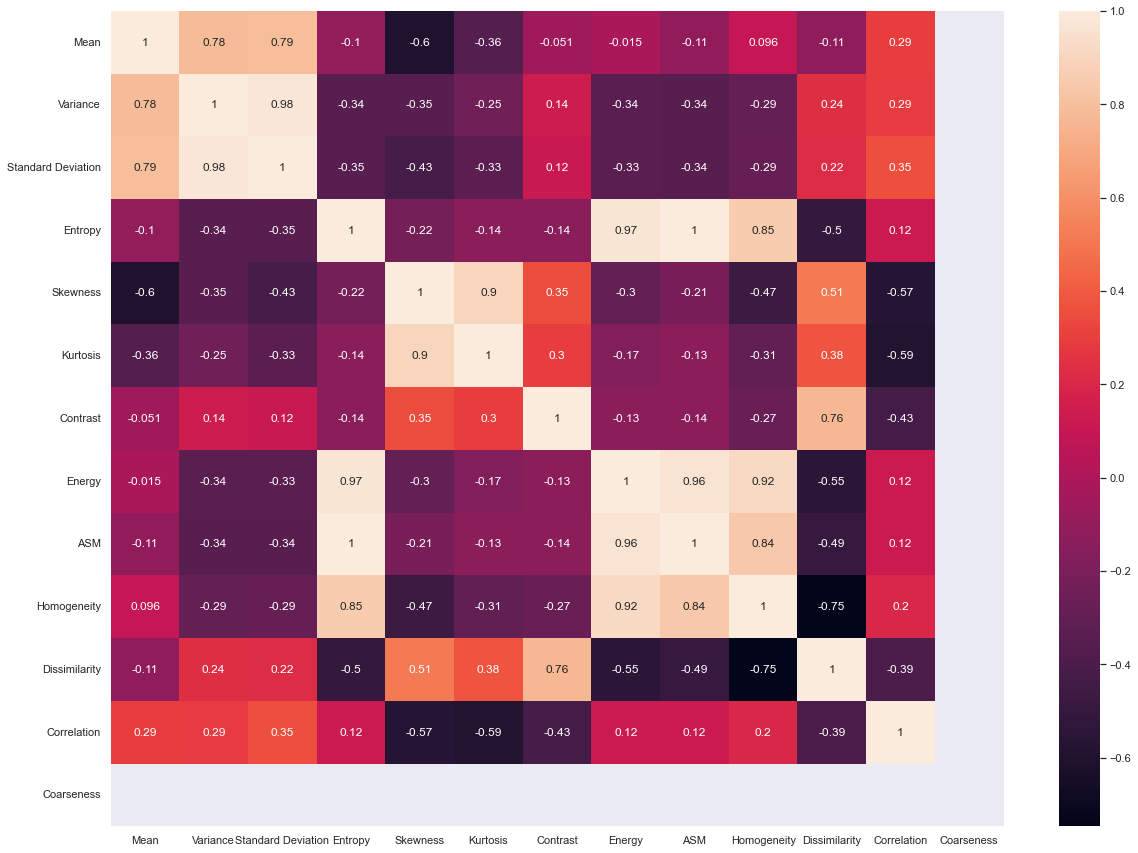

In [19]:
sns.heatmap(X.corr(), annot=True)

# Model Training

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

# With different classification methods

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred_lr = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_lr, y_test)*100)

97.60850310008857


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_lr, y_test)
cm

array([[605,  24],
       [  3, 497]], dtype=int64)

<AxesSubplot:>

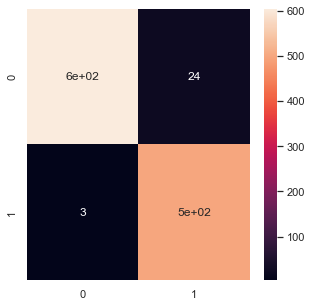

In [27]:
cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)

## Random Forest Classification

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [29]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
y_pred_rf = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_rf, y_test)*100)

98.49424269264836


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_rf, y_test)
cm

array([[605,  14],
       [  3, 507]], dtype=int64)

<AxesSubplot:>

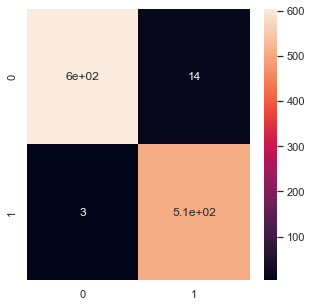

In [33]:
cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)

## Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [35]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred_dt = model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_dt, y_test)*100)

97.34278122232064


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_dt, y_test)
cm

array([[596,  18],
       [ 12, 503]], dtype=int64)

<AxesSubplot:>

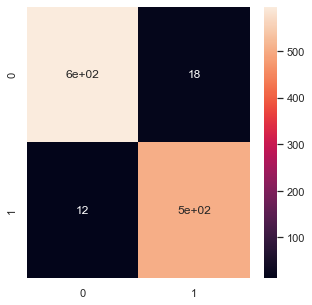

In [39]:
cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)

## K N N 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [41]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred_knn = model.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_knn, y_test)*100)

98.22852081488043


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_knn, y_test)
cm

array([[608,  20],
       [  0, 501]], dtype=int64)

<AxesSubplot:>

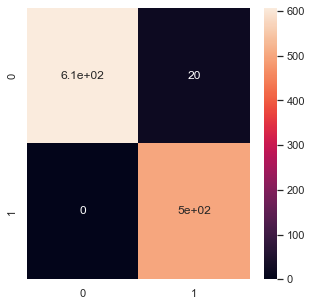

In [45]:
cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)

## Naive Bayes Classification

In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [47]:
model.fit(x_train, y_train)

GaussianNB()

In [48]:
y_pred_nb = model.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_nb, y_test)*100)

96.45704162976085


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_knn, y_test)
cm

array([[608,  20],
       [  0, 501]], dtype=int64)

<AxesSubplot:>

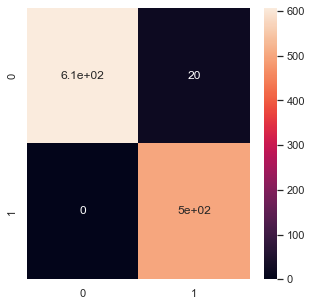

In [51]:
cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)

## XG Boost 

In [52]:
import xgboost as xgb
model=xgb.XGBClassifier()

In [53]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
y_pred_xg = model.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_nb, y_test)*100)

96.45704162976085


In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_knn, y_test)
cm

array([[608,  20],
       [  0, 501]], dtype=int64)

<AxesSubplot:>

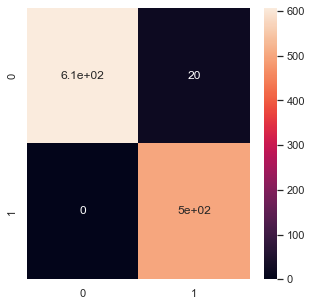

In [57]:
cm = pd.DataFrame(cm, index=[i for i in "01"], columns=[i for i in "01"])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)

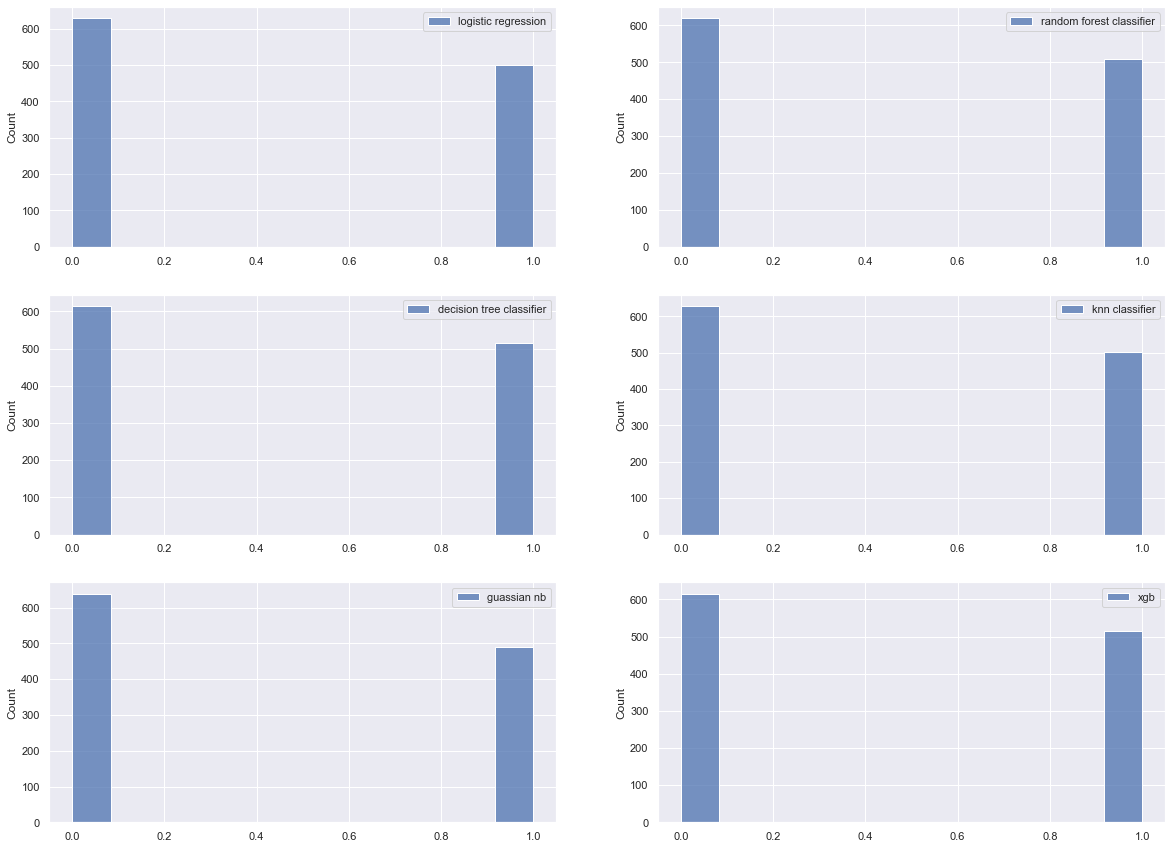

In [90]:
fig,ax=plt.subplots(nrows=3,ncols=2)
ax=ax.flatten()
sns.histplot(y_pred_lr,ax=ax[0],label="logistic regression")
ax[0].legend()
sns.histplot(y_pred_rf,ax=ax[1],label="random forest classifier")
ax[1].legend()
sns.histplot(y_pred_dt,ax=ax[2],label="decision tree classifier")
ax[2].legend()
sns.histplot(y_pred_knn,ax=ax[3],label="knn classifier")
ax[3].legend()
sns.histplot(y_pred_nb,ax=ax[4],label="guassian nb")
ax[4].legend()
sns.histplot(y_pred_xg,ax=ax[5],label="xgb")
ax[5].legend()

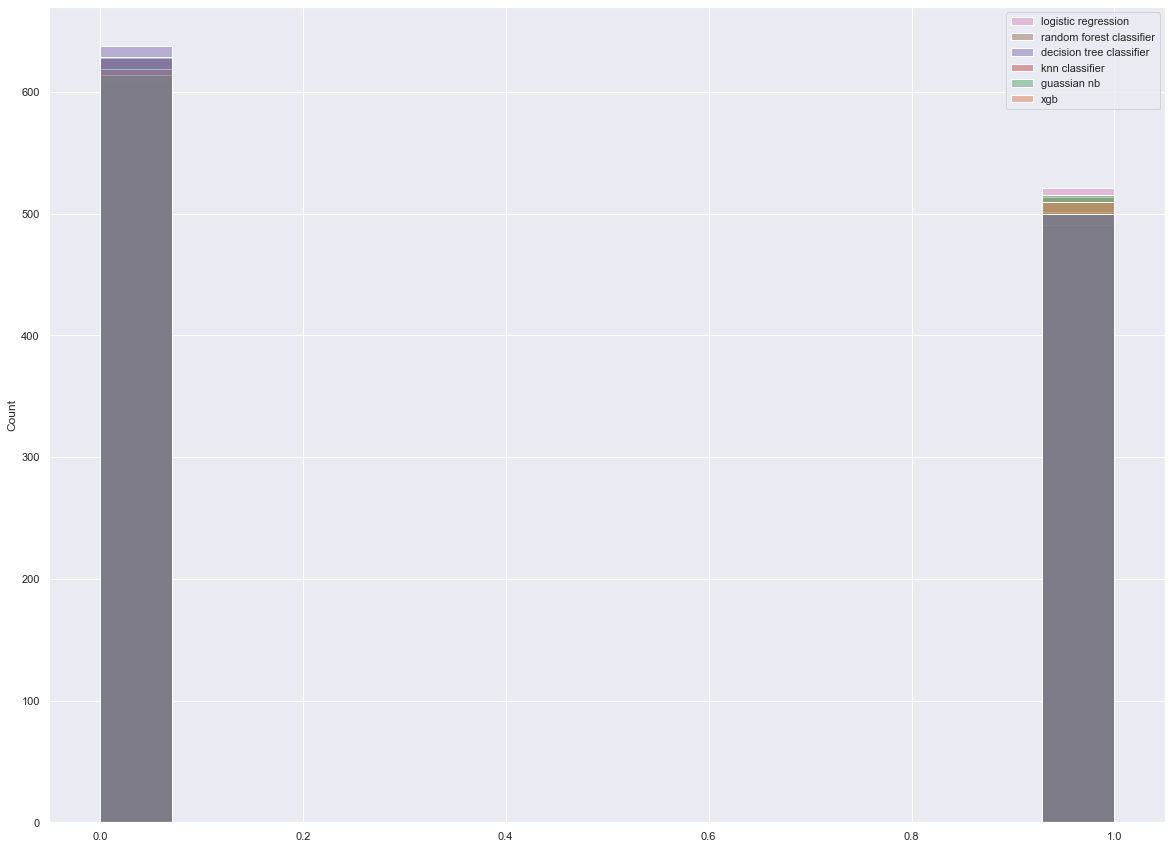

In [99]:
z=[y_pred_lr,y_pred_rf,y_pred_dt,y_pred_knn,y_pred_nb,y_pred_xg,y_test]
sns.histplot(data=z)
plt.legend(labels=["logistic regression","random forest classifier","decision tree classifier","knn classifier","guassian nb","xgb"])